In [1]:
# when the task is to classify, we can use logistic regressions

# by default 0 or 1 LogisticRegression object

import numpy as np 
from sklearn import linear_model
from sklearn.datasets import make_classification


In [2]:
# generate synthetic data with 100 samples with 2 features

data,labels = make_classification(n_samples=2,
                                  n_features=2,
                                  n_informative=2,
                                  n_redundant=0,
                                  random_state=42)

In [3]:
# Check the shape of the data and the first few labels
print('Data shape: {}'.format(data.shape))
print('Labels:\n{}'.format(repr(labels)))


Data shape: (2, 2)
Labels:
array([0, 1])


In [4]:
reg = linear_model.LogisticRegression()

reg.fit(data,labels)

# Let's assume you have new data to predict
new_data = np.array([[0.5, -0.1],
                     [-1.2, 2.0]])


In [5]:
predictions = reg.predict(new_data)
print("Predictions: {}".format(predictions))

Predictions: [0 1]


In [6]:
# when there is a need to classify multilabels
# it's not that straigtforward


When using logistic regression in scikit-learn, you can choose different solvers based on the nature of your data and the specific requirements of your classification task. Each solver has its own strengths and is optimized for certain types of data and logistic regression configurations. Here’s an overview of the solvers available in scikit-learn for logistic regression, and when to use them:

1. lbfgs
Description: LBFGS stands for Limited-memory Broyden-Fletcher-Goldfarb-Shanno. It is an optimizer that approximates the Broyden-Fletcher-Goldfarb-Shanno (BFGS) algorithm, which is a second-order optimization method (using second derivative information). The "limited-memory" aspect refers to the fact that it uses only a limited amount of memory, which makes it suitable for problems with large numbers of parameters or data points.
Use Case: Good default for small to medium datasets. It supports both L2 regularization and no regularization, and it can handle multinomial loss for multiclass problems.
2. newton-cg
Description: Newton's conjugate gradient method. Like LBFGS, this solver also leverages second-order derivative information but uses a different approach to approximate the inverse of the Hessian matrix.
Use Case: Efficient for datasets with a large number of features because it converges faster for large datasets. Supports only L2 regularization.
3. liblinear
Description: A library for large linear classification. It uses a coordinate descent (CD) algorithm and can be very efficient for small to medium datasets.
Use Case: Good for small datasets and supports both L1 and L2 regularization. However, it does not support multinomial logistic regression and is limited to one-vs-rest (OvR) classification.
4. sag
Description: Stochastic Average Gradient descent. It is a variation of gradient descent and is faster than other techniques when dealing with large datasets.
Use Case: Ideal for large datasets and supports only L2 regularization. However, it requires that features be scaled (e.g., using StandardScaler).
5. saga
Description: Extension of the SAG solver that also supports the L1 regularization, making it useful for implementing elastic-net regularization.
Use Case: Also designed for large datasets and is the only solver that supports elastic-net regularization, which is a combination of L1 and L2 regularization.
Strategies for Multiclass Classification
When dealing with multiclass classification, logistic regression can be configured to handle multiple classes in different ways:

One-vs-Rest (OvR) or One-vs-All (OvA):
Each class is separated from all other classes, creating as many binary classifiers as there are classes. Each classifier predicts whether an observation is in its class or not, making it suitable for binary logistic regression solvers.
Multinomial (Softmax Regression):
Directly models the probability distribution over multiple classes. It outputs the probabilities of each class as a single model. This method is generally more efficient in terms of computation and results, particularly when the classes are mutually exclusive.
The choice of solver and strategy can significantly impact the performance and efficiency of logistic regression models, especially when dealing with different types and sizes of datasets.

In [7]:
# iris dataset
from sklearn.datasets import load_iris 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt 
import seaborn as sns 


In [10]:
data,labels = load_iris(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(data,
                                                    labels,
                                                    test_size=0.4,
                                                    random_state=12)

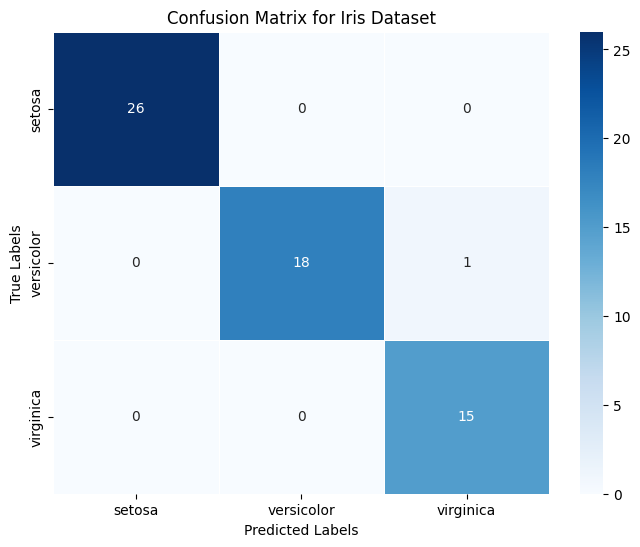

In [11]:
model = LogisticRegression(solver='lbfgs',
                           multi_class='multinomial',
                           max_iter=200)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
iris = load_iris()

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm,
            annot=True,
            fmt='d',
            linewidths=0.5,
            cmap='Blues',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)


plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Iris Dataset')
plt.show()

In [12]:
# Alternative cross validation


In [13]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Iris dataset
data, labels = load_iris(return_X_y=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=42)

# Initialize the LogisticRegressionCV
# cv=10 uses 10-fold cross-validation, 'multi_class' is set to 'multinomial' for a multiclass problem
# 'solver' is set to 'lbfgs' which is recommended for small datasets and supports 'multinomial'
model_cv = LogisticRegressionCV(cv=10, solver='lbfgs', multi_class='multinomial', max_iter=200)

# Fit the model
model_cv.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = model_cv.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the logistic regression model with cross-validation: {:.2f}%".format(accuracy * 100))

# Optionally, display the chosen values of C for each class
print("Optimal C values by class:", model_cv.C_)


Accuracy of the logistic regression model with cross-validation: 100.00%
Optimal C values by class: [2.7825594 2.7825594 2.7825594]
